

# <center> Linear Regression</center>


## About this Notebook
In this notebook, we learn how to use scikit-learn to implement simple linear regression. We download a dataset that is related to fuel consumption and Carbon dioxide emission of cars. Then, we split our data into training and test sets, create a model using training set, Evaluate your model using test set, and finally use model to predict unknown value


## Importing Needed packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** :year when the model of car was created ,e.g. 2014
- **MAKE** the brand of the vehicle ,e.g. Acura
- **MODEL**  refers to the name of a car product and sometimes a range of products , e.g. ILX
- **VEHICLE CLASS** Car Body Styles,  e.g. SUV
- **ENGINE SIZE** a larger engine is usually able to burn more fuel and produce more power,  e.g. 4.7
- **CYLINDERS** (The cylinder is the power unit of the engine. This is where fuel is burned and converted into mechanical energy that powers the vehicle.) e.g 6
- **TRANSMISSION**  type of the car's gear box , e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)**: (Highway (abrégé en HWY) est un terme anglophone qui désigne une voie publique, souvent une route principale ou une autoroute.),  e.g. 8.9 
- **FUEL CONSUMPTION COMB (L/100 km)** : (Combined fuel economy is a weighted average of City and Highway MPG values that is calculated by weighting the City value by 55% and the Highway value by 45%.) e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

* **MPG, or miles per gallon, is the distance, measured in miles, that a car can travel per gallon of fuel. MPG is also the primary measurement of a car's fuel efficiency: The higher a car's MPG, the more fuel efficient it is**.

## Reading the data

In [2]:
# read dataset
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()



,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration
Lets first have a descriptive exploration on our data.

In [3]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# select features for further exploration
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [40]:
df.MAKE.value_counts()

FORD             90
CHEVROLET        86
BMW              64
MERCEDES-BENZ    59
GMC              49
AUDI             49
TOYOTA           49
PORSCHE          44
VOLKSWAGEN       42
DODGE            39
MINI             36
NISSAN           33
KIA              33
CADILLAC         32
JEEP             31
MAZDA            27
HYUNDAI          24
SUBARU           23
LEXUS            22
JAGUAR           22
HONDA            21
INFINITI         21
LAND ROVER       19
CHRYSLER         19
MITSUBISHI       16
BUICK            16
RAM              13
ACURA            12
LINCOLN          11
VOLVO            11
FIAT             10
SCION             9
BENTLEY           8
ROLLS-ROYCE       7
ASTON MARTIN      7
MASERATI          6
LAMBORGHINI       3
SMART             2
SRT               2
Name: MAKE, dtype: int64

In [5]:
# correlations between variables
cdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


#### Now, lets plot each of these features vs the Emission, to see how linear is their relation:

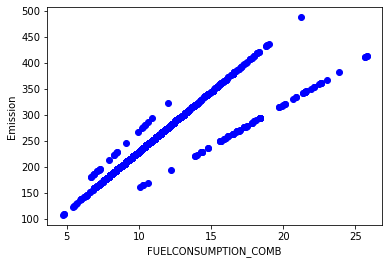

In [6]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

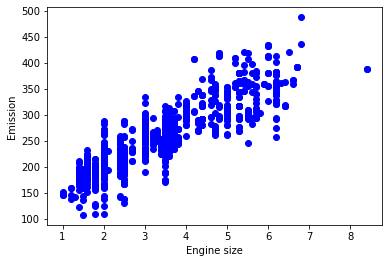

In [7]:
# plot Enginesize vs the Emission, to see how linear is their relation:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

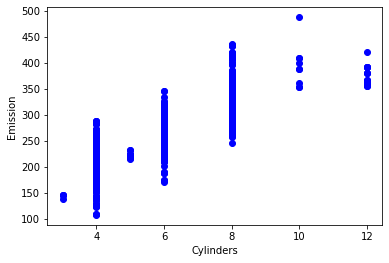

In [8]:
# plot CYLINDER vs the Emission, to see how linear is their relation:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()



## split data into features and target

In [9]:
# drop CO2Emissions from cdf and store it in X
X = cdf.drop('CO2EMISSIONS', axis=1)
y = cdf['CO2EMISSIONS'] # store CO2Emissions in y

print(X.shape) # check the shape of X
print(y.shape) # check the shape of y

(1067, 3)
(1067,)


## Creating train and test dataset


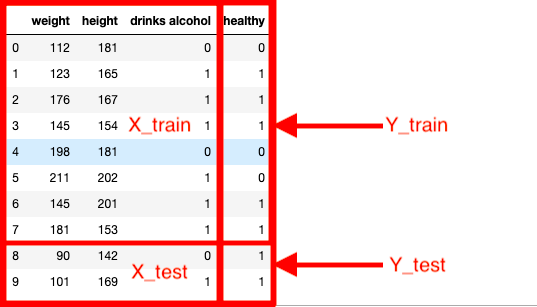

In [10]:
from sklearn.model_selection import train_test_split
# split data to X_train, X_test and y_train, y_test
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
X_train

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
270,3.6,6,12.6
1006,4.6,8,15.1
728,3.5,6,10.6
992,2.5,4,9.5
702,1.5,4,7.4
...,...,...,...
1033,2.0,4,6.9
763,3.5,6,16.0
835,3.7,6,11.7
559,5.0,8,13.3


## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

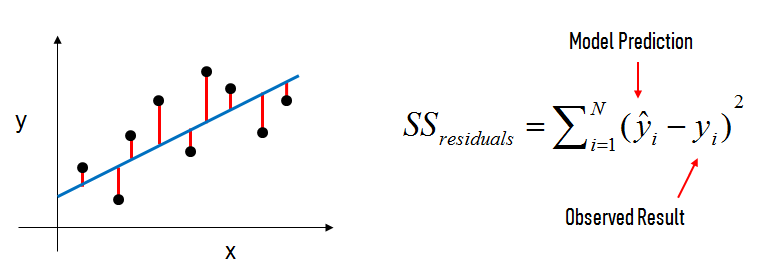

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope** (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

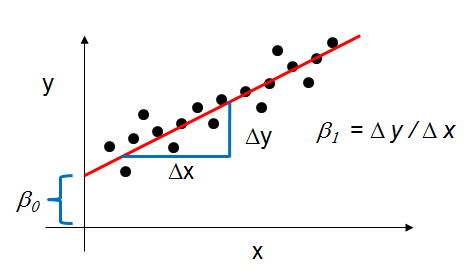

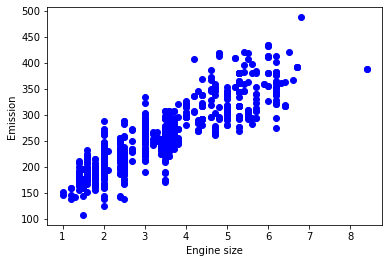

In [12]:
# plot relationship between enginesize and CO2Emissions from the training data
plt.scatter(X_train.ENGINESIZE,y_train,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [25]:
X_train[['ENGINESIZE']].shape

(853, 1)

In [26]:
# select enginesize from the X_train
X1_train = X_train[['ENGINESIZE']]

In [27]:
from sklearn.linear_model import LinearRegression

# initialize the model

regr = LinearRegression()

# train the model
regr.fit(X1_train, y_train)

# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [39.24838431]
Intercept:  126.18920154724933


As mentioned before, __Coefficient__ and __Intercept__ in the simple linear regression, are the parameters of the fit line. 
Given that it is a simple linear regression, with only 2 parameters, and knowing that the parameters are the intercept and slope of the line, sklearn can estimate them directly from our data. 
Notice that all of the data must be available to traverse and calculate the parameters.


## Plot outputs

we can plot the fit line over the data:

Text(0, 0.5, 'Emission')

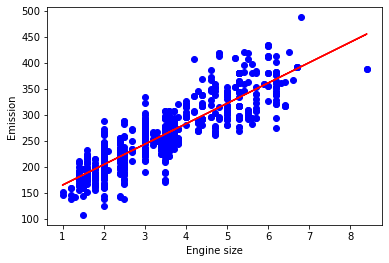

In [28]:
plt.scatter(X1_train, y_train,  color='blue')
plt.plot(X1_train, regr.coef_[0]*X1_train + regr.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

## Evaluation on Test Data
**Error metrics enable us to track the efficiency and accuracy through various metrics as shown below**

**==>Mean Square Error(MSE)**

**==>Root Mean Square Error(RMSE)**

**==>R-square**

**==>Accuracy**

**==>MAPE, etc.**

**RMSE**: A metric that tells us how far apart the predicted values are from the observed values in a dataset, on average. **The lower the RMSE, the better a model fits a dataset.**

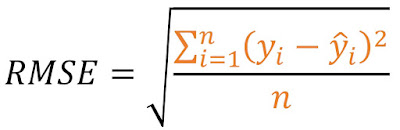

In [29]:
from sklearn.metrics import mean_squared_error

X1_test = X_test[['ENGINESIZE']]
y_pred = regr.predict(X1_test)

mse = mean_squared_error(y_test, y_pred)
print("Residual sum of squares (MSE):{}".format(mse))
rmse = np.sqrt(mse)
print("root mean square error rmse : {}".format(rmse))

Residual sum of squares (MSE):1181.528809303555
root mean square error rmse : 34.37337355139229


## Multiple Linear Regression

**Simple linear regression can easily be extended to include multiple features. This is called** **multiple linear regression**:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [31]:
# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

69.052209925538
[11.98993058  7.54469599  8.98695981]


In [32]:
y_pred=lm.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred)
print("Residual sum of squares (MSE):{}".format(mse))
rmse = np.sqrt(mse)
print("root mean square error rmse : {}".format(rmse))

Residual sum of squares (MSE):589.2351940837912
root mean square error rmse : 24.274167217101212


In [39]:
pd.Series(y_pred)

0      334.652273
1      209.788162
2      217.876425
3      229.373229
4      194.810627
          ...    
209    200.498709
210    209.485669
211    193.006649
212    190.310561
213    187.912575
Length: 214, dtype: float64

In [38]:
y_test

766     356
204     209
629     230
897     212
711     168
       ... 
822     198
1029    221
798     191
803     184
251     184
Name: CO2EMISSIONS, Length: 214, dtype: int64